# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

In [1]:
NAME = "GIN21"
COLLABORATORS = "Szymon Marczak 405302, Dawid Makowski 407894, Tomasz Sanicki 408056"

---

## Zestaw zadań 2: Badanie intensywności procesów punktowych (część 1)

In [16]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")

In [18]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE

#Proces jednorodny Poissona 

def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    
    x = np.random.poisson(intensity * x_lim[1] * y_lim[1]) #Generuję proces Poissona o liczbie punktów wg wzoru liczba = intensywność * pole
    tab = np.zeros((x,2)) #Tworzę tablicę zer z tą liczbą punktów
    
    #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
    for i in range(x):
        
        tab[i,0] += np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        tab[i,1] += np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        
    return pd.DataFrame({"X":tab[:,0], "Y":tab[:,1]}) #Zwracam DataFrame'a

#Proces niejednorodny Poissona
    
def intensity_function (x,y):
    z = 10*(np.cos(np.pi*x/4)+1)
    return z

def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):

    #Tworzę dwie tablice przechowujące 100 liczb między skrajnymi wartościami wspołrzędnych razem tworzących siatkę 100x100
    #(potrzebne będzie do określenia maksymalnej wartości intensywności funkcji), poniżej tworzę tablicę stu liczb
    x1 = np.array(list(np.linspace(x_lim[0], x_lim[1], 100)))
    y1 = np.array(list(np.linspace(y_lim[0], y_lim[1], 100)))
    
    #Obliczam intensywność funkcji, intensity_function zwraca tablicę wartości tej funkcji i wyłaniamy największą wartość
    intensywnosc = max(intensity_function(x1, y1))
    
    points = pd.DataFrame(columns  = ["X", "Y"]) #Tworzę DataFrame'a, który będziesz zawierał informacje o współrzędnych punktów
    ile = np.random.poisson(intensywnosc*x_lim[1]*y_lim[1]) #Obliczam ile może być punktów losowych funkcją np.random.poisson()
    
    #Pętla po każdym punkcie losowym
    for i in range(ile):
        
        #Współrzęna = Element losowy w zakresie (zakres = rand(0,1) * (góra - dół) + dół)
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]        
        
        #Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym 1 - i / max(i)
        #gdzie:
        #i to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu,
        #max(i) to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru
        if 1 - intensity_function(x,y) / intensywnosc <= np.random.rand(): #Realizacja powyższego warunku
            
            #Tylko pasujące punkty są dodawane do DataFrame'a
            #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
            points.loc[len(points.index)] = [x,y]

    return points #Zwracam DataFrame'a z punktami
    
#Proces Materna

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):

    #PROCES RODZICIELSKI
    ile = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1]) #Obliczam ile może być punktów losowych rozkładu rodzicielskiego
    df_parent =  pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu rodzicielskiego
    
    #Współrzędne punktów procesu rodzicielskiego
    for i in range(ile):
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        df_parent.loc[len(df_parent.index)] = [x,y]
    
    #PROCES POTOMNY
    points = pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu potomnego
    liczba_punktow_procesu = int(daughter_intensity*np.pi*cluster_radius**2) #liczba punktów procesu potomnego dla pętli for
    
    #Pętla przebiegająca po każdym skupieniu
    for i in range(ile): 
         #Pętla przebiegająca po każdym punkcie w danym skupieniu
        for j in range(liczba_punktow_procesu):
            
            #Generuję punkt w procesie równomiernego rozłożenia w kole
            angle = np.random.rand() * 2 * np.pi #losowy kąt
            radius = cluster_radius * np.sqrt(np.random.rand()) #losowy promień
            
            #Współrzędne punktu w kole względem jego środka
            x_wsp_rand = np.cos(angle) * radius
            y_wsp_rand = np.sin(angle) * radius
            
            #Dodaję współrzędne środka koła (skupienia) do współrzędnych punktu, żeby przypisać go do danego skupienia
            x = x_wsp_rand + df_parent["X"][i]
            y = y_wsp_rand + df_parent["Y"][i]
            
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if x <= x_lim[1] and y <= y_lim[1] and x >= x_lim[0] and y >= y_lim[0]:
                
                #Tylko punkty znajdujące się w prostokącie zostają dopisane do DataFrame'a
                #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
                points.loc[len(points.index)] = [x,y]
                
    return points #Zwracam DataFrame'a

#Proces Thomasa

def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    
    #PROCES RODZICIELSKI
    ile = np.random.poisson(parent_intensity * x_lim[1] * y_lim[1]) #Obliczam ile może być punktów losowych rozkładu rodzicielskiego
    df_parent =  pd.DataFrame(columns  = ["X", "Y"]) #DataFrame na punkty procesu rodzicielskiego
    
    #Współrzędne punktów procesu rodzicielskiego
    for i in range(ile):
        x = np.random.rand() * (x_lim[1] - x_lim[0]) + x_lim[0]
        y = np.random.rand() * (y_lim[1] - y_lim[0]) + y_lim[0]
        df_parent.loc[len(df_parent.index)] = [x,y]
    
    #Tablica z liczbą punktów w każdym skupieniu
    cluster_sizes = np.zeros((ile,), dtype=int) #Inicjacja tablicy
    cluster_sizes[:] = [int(np.random.poisson(mean_cluster_size)) for i in range(ile)] #Przypisanie losowych liczb na podstawie oczekiwanej liczebności generowanych klastrów
    
    #PROCES POTOMNY
    points = pd.DataFrame(columns = ["X", "Y"]) #DataFrame na punkty procesu potomnego
    
    #Pętla przebiegająca po każdym skupieniu
    for i in range(ile):
        #Pętla przebiegająca po każdym punkcie w danym skupieniu (ilość punktów w skupieniu - cluster_sizes[i])
        for j in range(cluster_sizes[i]):
            
            #Generuję losową zmienną dla współrzędnych z rozkładu losowego
            x_wsp_rand = np.random.normal(0, cluster_sigma)
            y_wsp_rand = np.random.normal(0, cluster_sigma)
            
            #Dodaję współrzędne środka koła (skupienia) do współrzędnych punktu, żeby przypisać go do danego skupienia
            x = x_wsp_rand + df_parent["X"][i]
            y = y_wsp_rand + df_parent["Y"][i]
            
            #Warunek czy dany punkt znajduje się w zakresie ustalonym w parametrach funkcji (x_lim i y_lim)
            if x <= x_lim[1] and y <= y_lim[1] and x >= x_lim[0] and y >= y_lim[0]:
                
                #Tylko punkty znajdujące się w prostokącie zostają dopisane do DataFrame'a
                #Wstawiam na nowy indeks (indeks o numerze długości DataFrame'a jest o jeden dalej niż dotychczasowy, ostatni indeks)
                points.loc[len(points.index)] = [x,y]
   

    return points #Zwracam DataFrame'a

#raise NotImplementedError()

### Przygotowanie danych (5 pkt)

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkłada Poissona:
 - intensywność procesu: 20
 
Niejednorodny rozkład Poissona:
 - intensywność procesu: f(x, y) = $10(cos(\frac{\pi}{4} x)+1)$

Rozkład Materna:
 - intensywność procesu macierzystego: 0.15
 - intensywność procesu potomnego: 15
 - promień klastra: 1.25
 
Rozkład Thomasa:
 - intensywność procesu macierzystego: 0.3
 - średnia liczebność klastra: 20
 - odchylenie standardowe klastra: 0.75

Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [-10, 10]
 - zakres wartości współrzędnej y: [-5, 5]

In [19]:
# YOUR CODE HERE

tab_HP = pd.read_csv("./dane_tymczasowe_HP.csv")
tab_M = pd.read_csv("./dane_tymczasowe_M.csv")
tab_T = pd.read_csv("./dane_tymczasowe_T.csv")
tab_UP = pd.read_csv("./dane_tymczasowe_UP.csv")

tab_homo_poisson = homogeneous_poisson_on_rectangle(20, [-10,10], [-5,5])
tab_unhom_poisson = unhomogeneous_poisson_on_rectangle(intensity_function, [-10,10], [-5,5])
tab_matern = materna_on_rectangle(0.15, 15, 1.25, [-10,10], [-5,5])
tab_thomas = thomas_on_rectangle(0.3, 20, 0.75, [-10,10], [-5,5])

#raise NotImplementedError()

### Zadanie 1: Badanie intensywności procesu punktowego metodą szacowania lokalnego (20 pkt)

Przygotuj funkcję `point_count_on_subregions()`, która będzie zliczać punkty w obrębie prostokątnych podobszarów oraz funkcję `intensity_on_subregions()`, która będzie obliczać intensywność procesu punktowego w obrębie prostokątnych podobszarów.

Następnie wykorzystaj przygotowane funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Ustaw podział obszaru na 40 podobszarów wzdłuż osi $x$ i 20 podobszarów wzdłuż osi $y$.

Przedstaw wyniki analizy graficznie w postaci histogramów dwuwymiarowych z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

#### a) Przygotowanie funkcji

In [20]:
def point_count_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    bin_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z liczbą punków przypisanych do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[7, 2], [4, 5]])]
    """
    # YOUR CODE HERE 
    
    #Funkcja histogram2d wywołuje się z parametrami:
    # x,y - Współrzędne punktów
    # bins - Lista określająca liczbę podobszarów w poziomie i pionie
    # range - Lista zakresów współrzędnych
    return np.histogram2d(points["X"], points["Y"], bins = bins, range = [x_lim, y_lim])

    #raise NotImplementedError()

def intensity_on_subregions(points, bins, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    bins: list
        Lista określająca liczbę podobszarów w poziomie i pionie.
        Przykład: [10, 10]
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: list
        Lista zawierająca trzy macierze:
        - 1D ze współrzędnymi krawędzi podobszarów na osi X,
        - 1D ze współrzędnymi krawędzi podobszarów na osi Y,
        - 2D z wartością intensywności przypisaną do każdego z podobszarów.
        Na przykład: [array([0, 1, 2]), array([0, 1, 2]), array([[9, 12], [13, 8]])]
    """
    # YOUR CODE HERE
    
    #Wywołanie pierwszej funkcji
    #zmienna hist2d zawiera dwie tablice 1D ze współrzędnymi krawędzi i macierz 2D z liczbą punków przypisanych do każdego z podobszarów
    hist2d = point_count_on_subregions(points, bins, x_lim, y_lim)
    
    #W indeksie zerowym jest macierz 2D z liczbą punków przypisanych do każdego z podobszarów
    point_count = hist2d[0]
    
    #Tablica 2D, która będzie zawierać intensywności punktów na danym podobszarze
    intensity = np.zeros((bins[0], bins[1]))
    
    #Pole dla wszystkich podobszarów (takie same)
    area = (x_lim[1] - x_lim[0]) * (y_lim[1] - y_lim[0]) / (bins[0] * bins[1])
    
    #Obliczam intensywność każdego podobszaru
    for i in range(bins[0]):
        for j in range(bins[1]):
            single_count = point_count[i,j] #Liczba punktów w danym podobszarze
            intensity[i,j] = single_count / area #Intensywność jako iloraz liczby punktów i pola podobszaru
            
    intensity_data = tuple((hist2d[1], hist2d[2], intensity)) #Tworzę listę do zwrócenie w takiej samej formie jak w pierwszej funkcji
    return intensity_data #Zwracam listę

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [21]:
# YOUR CODE HERE

intens_hom_poisson = intensity_on_subregions(tab_homo_poisson, [20,40], [-10,10], [-5,5])
intens_unhom_poisson = intensity_on_subregions(tab_unhom_poisson, [20,40], [-10,10], [-5,5])
intens_matern = intensity_on_subregions(tab_matern, [20,40], [-10,10], [-5,5])
intens_thomas = intensity_on_subregions(tab_thomas, [20,40], [-10,10], [-5,5])

#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Proces Thomasa')

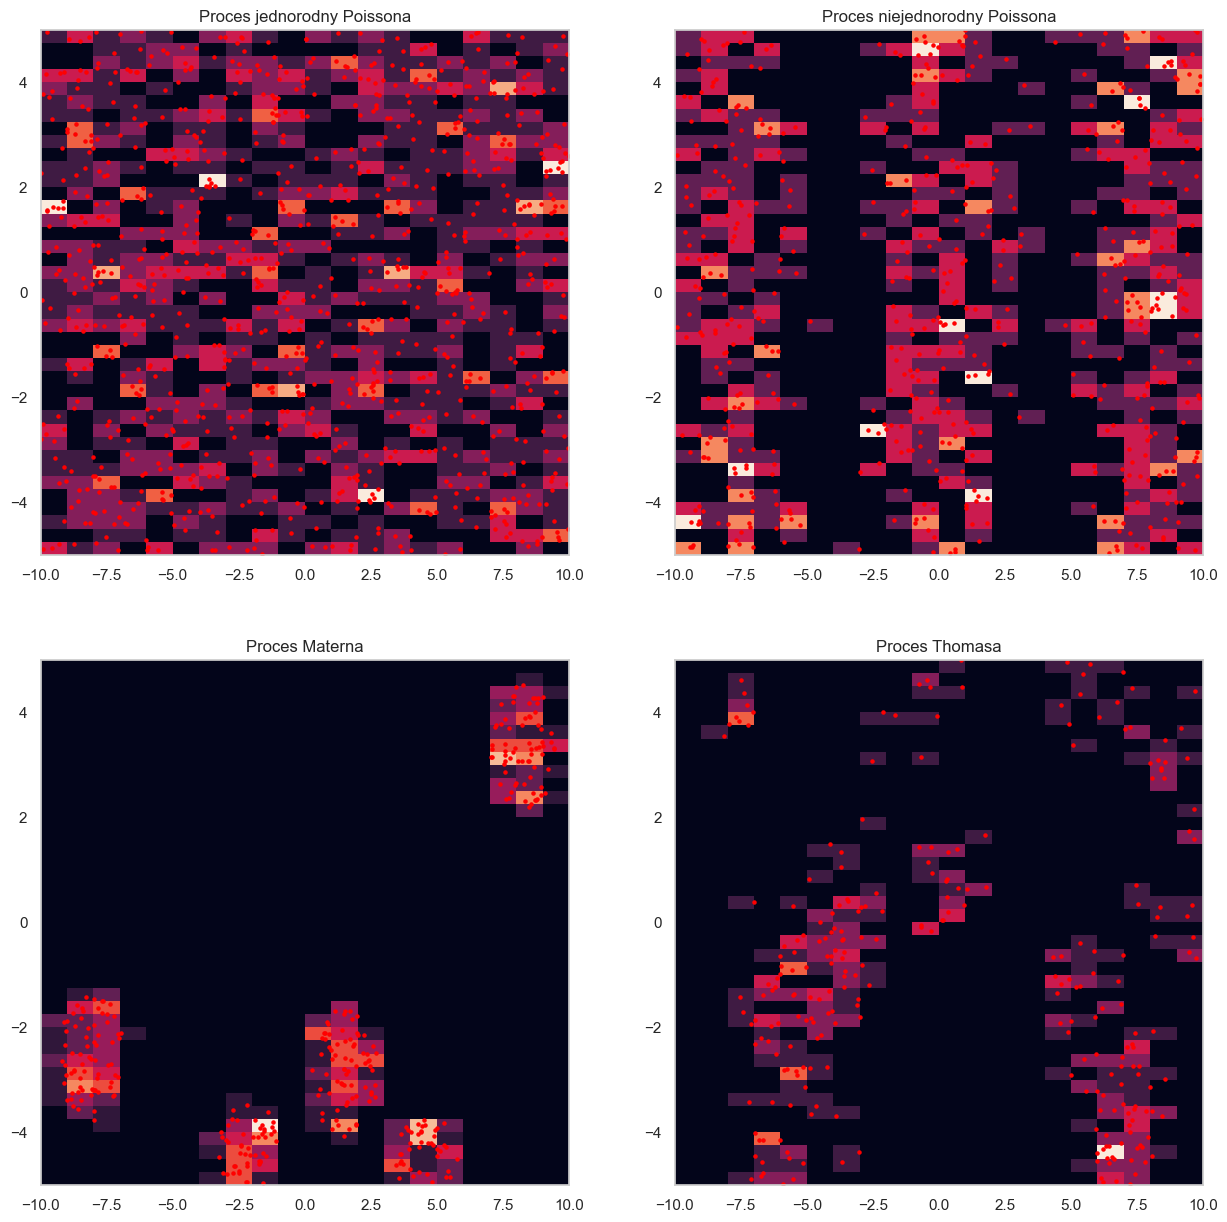

In [22]:
# YOUR CODE HERE

fig, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].pcolormesh(intens_hom_poisson[0], intens_hom_poisson[1], intens_hom_poisson[2].T)
axs[0,0].scatter(tab_homo_poisson["X"], tab_homo_poisson["Y"], color = "red", s = 5)
axs[0,0].set_title("Proces jednorodny Poissona")
axs[0,1].pcolormesh(intens_unhom_poisson[0], intens_unhom_poisson[1], intens_unhom_poisson[2].T)
axs[0,1].scatter(tab_unhom_poisson["X"], tab_unhom_poisson["Y"], color = "red", s = 5)
axs[0,1].set_title("Proces niejednorodny Poissona")
axs[1,0].pcolormesh(intens_matern[0], intens_matern[1], intens_matern[2].T)
axs[1,0].scatter(tab_matern["X"], tab_matern["Y"], color = "red", s = 5)
axs[1,0].set_title("Proces Materna")
axs[1,1].pcolormesh(intens_thomas[0], intens_thomas[1], intens_thomas[2].T)
axs[1,1].scatter(tab_thomas["X"], tab_thomas["Y"], color = "red", s = 5)
axs[1,1].set_title("Proces Thomasa")

#plt.title("Mapa intensywności procesu punktowego w podobszarach")
#plt.xlabel("Y")
#plt.ylabel("X")

#raise NotImplementedError()

### Zadanie 2: Badanie intensywności procesu punktowego metodą funkcji jądrowych (25 pkt)

Przygotuj funkcję `intensity_on_kde()`, która będzie obliczać intensywność procesu punktowego z wykorzystaniem jądrowego estymatora funkcji intensywności danego wzorem:
$$ 	\grave{\lambda}(x,y) = \sum_{d_i < \tau} \frac{3}{\pi \tau^2} (1-\frac{d_i^2}{\tau^2})^2$$ 

gdzie: $d_i$ - odległość punktu od centrum funkcji jądrowej, $\tau$ - promień funkcji jądrowej.

Następnie wykorzystaj przygotowaną funkcje do zbadania intensywności wszystkich przygotowanych rozkładów punktów. Wykonaj obliczania dla promienia funkcji jądrowej równego 1.5 i siatki  200x100 regularnie rozłożonych i pokrywających cały obszar punktów.

Przedstaw wyniki analizy graficznie w postaci wykresów konturowych z wypełnieniem z nałożonymi na nie rozkładami punktów. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x2).

Uwaga! Funkcja przygotowana według powyższych wytycznych nie ma wbudowanego mechanizmu korekty na efekt brzegowy, w związu z czym będzie zaniżać wartość intensywności przy krawędziach analizowanego obszaru.

#### a) Przygotowanie funkcji

In [125]:
def intensity_on_kde(points, kernel_radius, grid, x_lim, y_lim):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    grid: list
        Lista określająca liczbę punktów w poziomie i pionie, dla których wyliczane będą wartości intensywności.
        Przykład: [10, 10]
    kernel_radius: float
        Liczba dodatnia określająca promień funkcji jądrowej.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    intensity_data: DataFrame
        Tablica zawierająca trzy kolumny - dwie ze współrzędnymi opisane jako "X" i "Y"
        oraz kolumnę z wartościami intensywności wyliczonymi dla tych współrzędnych opisaną jako "I".
    """
    # YOUR CODE HERE
    
    #DataFrame do przechowania danych wynikowych
    intensity_data = pd.DataFrame(columns = ["X", "Y", "I"])
    tab = np.zeros((grid[0] * grid[1], 3))
    
    #Tworzę tablicę wszystkich możliwych liczb dla współrzędnych
    x = np.linspace(x_lim[0], x_lim[1], grid[0])
    y = np.linspace(y_lim[0], y_lim[1], grid[1])
    
    #Wykonuję iloczyn kartezjański dla dwóch tablich tych liczb
    xs,ys = np.meshgrid(x, y)
    x = xs.flatten()
    y = ys.flatten()
    intensity_data["X"] = x
    intensity_data["Y"] = y
    
    #Przypisuję intensywności zero, poniewaź jeśli warunek odległości nie jest spełniony to intensywność = 0
    intensywnosci = np.zeros(np.shape(x)[0])
    
    #Dla każdego punktu siatki
    for i in range(np.shape(x)[0]): 
        
        #Dla każdego punktu testowanego procesu
        for j in range(len(points)):
            #Liczę odległość do każdego punktu procesu dla danego punktu siatki 
            odleglosci = np.sqrt((points["X"][j] - x[i])**2 + (points["Y"][j] - y[i])**2)
            
            #Sprawdzam czy odległość do danego punktu jest mniejsza niż zadany kernel_radius
            if odleglosci < kernel_radius:
                #Jeśli tak to liczę intensywność ze wzoru
                intensywnosci[i] += (3/(np.pi * kernel_radius**2)) * (1 - (odleglosci**2/kernel_radius**2))
    
    intensity_data["I"] = intensywnosci #Przypisuję wartość intensywności do trzeciej kolumny DataFrame'a
    return intensity_data

    #raise NotImplementedError()

#### b) Wygenerowanie danych

In [133]:
# YOUR CODE HERE

kernel_homo_poisson = intensity_on_kde(tab_homo_poisson, 1.5, [40,20], [-10,10], [-5,5])
kernel_unhom_poisson = intensity_on_kde(tab_unhom_poisson, 1.5, [40,20], [-10,10], [-5,5])
kernel_matern = intensity_on_kde(tab_matern, 1.5, [40,20], [-10,10], [-5,5])
kernel_thomas = intensity_on_kde(tab_thomas, 1.5, [40,20], [-10,10], [-5,5])

#raise NotImplementedError()

#### c) Wizualizacja

Text(0.5, 1.0, 'Proces Thomasa')

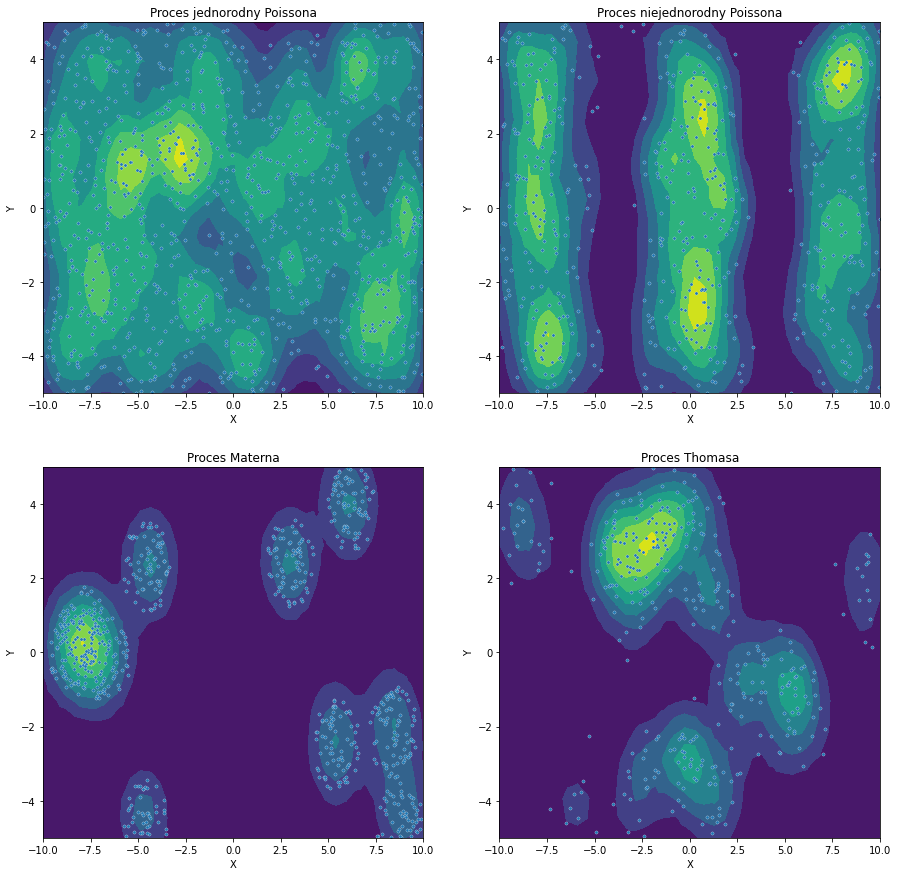

In [134]:
# YOUR CODE HERE

fig, axs = plt.subplots(2, 2, figsize = (15,15))

axs[0,0].tricontourf(kernel_homo_poisson["X"], kernel_homo_poisson["Y"], kernel_homo_poisson["I"])
sns.scatterplot(data = tab_homo_poisson, x = "X", y = "Y", s = 10, ax = axs[0,0]) #Miejsce do wybrania procesu (musi być zgodny z tym, wybranym w funkcji intensity_on_kde())
axs[0,0].set_title("Proces jednorodny Poissona")
axs[0,1].tricontourf(kernel_unhom_poisson["X"], kernel_unhom_poisson["Y"], kernel_unhom_poisson["I"])
sns.scatterplot(data = tab_unhom_poisson, x = "X", y = "Y", s = 10, ax = axs[0,1]) #Miejsce do wybrania procesu (musi być zgodny z tym, wybranym w funkcji intensity_on_kde())
axs[0,1].set_title("Proces niejednorodny Poissona")
axs[1,0].tricontourf(kernel_matern["X"], kernel_matern["Y"], kernel_matern["I"])
sns.scatterplot(data = tab_matern, x = "X", y = "Y", s = 10, ax = axs[1,0]) #Miejsce do wybrania procesu (musi być zgodny z tym, wybranym w funkcji intensity_on_kde())
axs[1,0].set_title("Proces Materna")
axs[1,1].tricontourf(kernel_thomas["X"], kernel_thomas["Y"], kernel_thomas["I"])
sns.scatterplot(data = tab_thomas, x = "X", y = "Y", s = 10, ax = axs[1,1]) #Miejsce do wybrania procesu (musi być zgodny z tym, wybranym w funkcji intensity_on_kde())
axs[1,1].set_title("Proces Thomasa")

#raise NotImplementedError()